In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

In [2]:
sns.set()
sns.set_style('ticks')
sns.set_context('paper',rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8})
#plt.rcParams['figure.figsize'] = (9.0, 3.0)

### Pascal VOC

In [3]:
def get_results_voc(eval_output, base_performance, verbose=0):

    results = np.zeros((20,6), dtype='float32')
    results[:,0] = base_performance

    for i, distortion in enumerate(eval_output):
        for severity in eval_output[distortion]:
            mAP = np.mean([eval_output[distortion][severity][j]['ap'] for j in range(len(eval_output[distortion][severity]))])
            results[i, severity] = mAP
            if verbose > 0:
                print(distortion, severity, mAP)
                
    return results

def get_distortions(eval_output):
    distortions = []
    for i, distortion in enumerate(eval_output):
        distortions.append(distortion)
    return distortions

In [4]:
with open("results/faster_rcnn_r50_fpn_1x_2gpu_voc0712_all_1-5_results.pkl", "rb") as f:
    voc_out = pickle.load(f)
with open("results/faster_rcnn_r50_fpn_1x_1gpu_svoc0712_all_1-5_results.pkl", "rb") as f:
    svoc_out = pickle.load(f)
with open("results/faster_rcnn_r50_fpn_1x_4gpu_voc0712svoc0712_all_1-5_results.pkl", "rb") as f:
    voc_svoc_out = pickle.load(f)
# with open("results/faster_rcnn_r50_fpn_1x_2gpu_voc0712svoc0712_short_all_1-5_results.pkl", "rb") as f:
#     voc_svoc_short_out = pickle.load(f)
    
# with open("results/faster_rcnn_r50_fpn_1x_1gpu_prevoc0712_voc0712_all_1-5_results.pkl", "rb") as f:
#     pre_voc_out = pickle.load(f)
# with open("results/faster_rcnn_r50_fpn_1x_1gpu_prevoc0712_svoc0712_all_1-5_results.pkl", "rb") as f:
#     pre_svoc_out = pickle.load(f)
# with open("results/faster_rcnn_r50_fpn_1x_4gpu_prevoc0712_voc0712svoc0712_all_1-5_results.pkl", "rb") as f:
#     pre_voc_svoc_out = pickle.load(f)
# with open("results/faster_rcnn_r50_fpn_1x_2gpu_prevoc0712_voc0712svoc0712_short_all_1-5_results.pkl", "rb") as f:
#     pre_voc_svoc_short_out = pickle.load(f)

In [5]:
distortions = get_distortions(voc_out)

In [6]:
voc_results = get_results_voc(voc_out, base_performance=0.805)
svoc_results = get_results_voc(svoc_out, base_performance=0.680)
voc_svoc_results = get_results_voc(voc_svoc_out, base_performance=0.804)
voc_svoc_short_results = get_results_voc(voc_svoc_short_out, base_performance=0.774)

pre_voc_results = get_results_voc(voc_out, base_performance=0.804)
pre_svoc_results = get_results_voc(svoc_out, base_performance=0.734)
pre_voc_svoc_results = get_results_voc(voc_svoc_out, base_performance=0.806)
pre_voc_svoc_short_results = get_results_voc(voc_svoc_short_out, base_performance=0.807)

In [74]:
# absolute performance under corruption
print(np.mean(voc_results[:15,1:]), 
      np.mean(svoc_results[:15,1:]), 
      np.mean(voc_svoc_results[:15,1:]))

# realtive performance
print(np.mean(voc_results[:15,1:])/voc_results[0,0], 
      np.mean(svoc_results[:15,1:])/svoc_results[0,0], 
      np.mean(voc_svoc_results[:15,1:])/voc_svoc_results[0,0])

0.48611867 0.49975255 0.5616002
0.60387415 0.7349302 0.6985077


### Plots

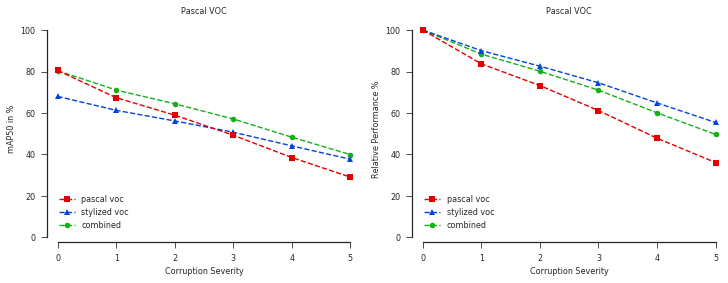

In [77]:
fig = plt.figure(figsize = (12, 4.0))

plt.subplot(1,2,1)
plt.plot(list(range(6)), np.mean(voc_results[:15,:], axis=0) * 100, 's--', zorder=3, color='xkcd:red', label='pascal voc')
plt.plot(list(range(6)), np.mean(svoc_results[:15,:], axis=0) * 100, '^--', zorder=2, color='xkcd:blue', label='stylized voc')
plt.plot(list(range(6)), np.mean(voc_svoc_results[:15,:], axis=0) * 100, 'o--', zorder=1, color='xkcd:green', label='combined')

plt.title('Pascal VOC')
plt.xlabel('Corruption Severity')
plt.ylabel('mAP50 in %')
plt.axis([-0.1,5.1,0,105])
plt.legend(loc=3)

plt.subplot(1,2,2)
plt.plot(list(range(6)), np.mean(voc_results[:15,:], axis=0)/voc_results[0,0] * 100, 's--', zorder=3, color='xkcd:red', label='pascal voc')
plt.plot(list(range(6)), np.mean(svoc_results[:15,:], axis=0)/svoc_results[0,0] * 100, '^--', zorder=2, color='xkcd:blue', label='stylized voc')
plt.plot(list(range(6)), np.mean(voc_svoc_results[:15,:], axis=0)/voc_svoc_results[0,0] * 100, 'o--', zorder=1, color='xkcd:green', label='combined')

plt.title('Pascal VOC')
plt.xlabel('Corruption Severity')
plt.ylabel('Relative Performance %')
plt.axis([-0.1,5.1,0,105])
plt.legend(loc=3)


sns.despine(trim=True, offset=5)

plt.show()

fig.savefig('figures/results_voc_combined.pdf', bbox_inches='tight')

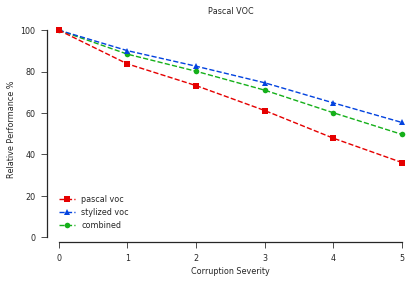

In [72]:
fig = plt.figure(figsize = (6.4, 4.0))

plt.plot(list(range(6)), np.mean(voc_results[:15,:], axis=0)/voc_results[0,0] * 100, 's--', zorder=3, color='xkcd:red', label='pascal voc')
plt.plot(list(range(6)), np.mean(svoc_results[:15,:], axis=0)/svoc_results[0,0] * 100, '^--', zorder=2, color='xkcd:blue', label='stylized voc')
plt.plot(list(range(6)), np.mean(voc_svoc_results[:15,:], axis=0)/voc_svoc_results[0,0] * 100, 'o--', zorder=1, color='xkcd:green', label='combined')
# plt.plot(list(range(6)), np.mean(voc_svoc_short_results, axis=0) * 100, 's--', zorder=0, color='xkcd:dandelion', label='combined (short)')

# plt.plot(list(range(6)), np.mean(pre_voc_results, axis=0) * 100, 's--', zorder=0, color='xkcd:light red')
# plt.plot(list(range(6)), np.mean(pre_svoc_results, axis=0) * 100, '^--', zorder=0, color='xkcd:light blue')
# plt.plot(list(range(6)), np.mean(pre_voc_svoc_results, axis=0) * 100, 'o--', zorder=0, color='xkcd:light green')
# plt.plot(list(range(6)), np.mean(pre_voc_svoc_short_results, axis=0) * 100, 's--', zorder=0, color='xkcd:light yellow')


plt.title('Pascal VOC')
plt.xlabel('Corruption Severity')
plt.ylabel('Relative Performance %')
plt.axis([-0.1,5.1,0,105])
plt.legend(loc=3)


sns.despine(trim=True, offset=5)

plt.show()

fig.savefig('figures/results_voc_combined.pdf', bbox_inches='tight')

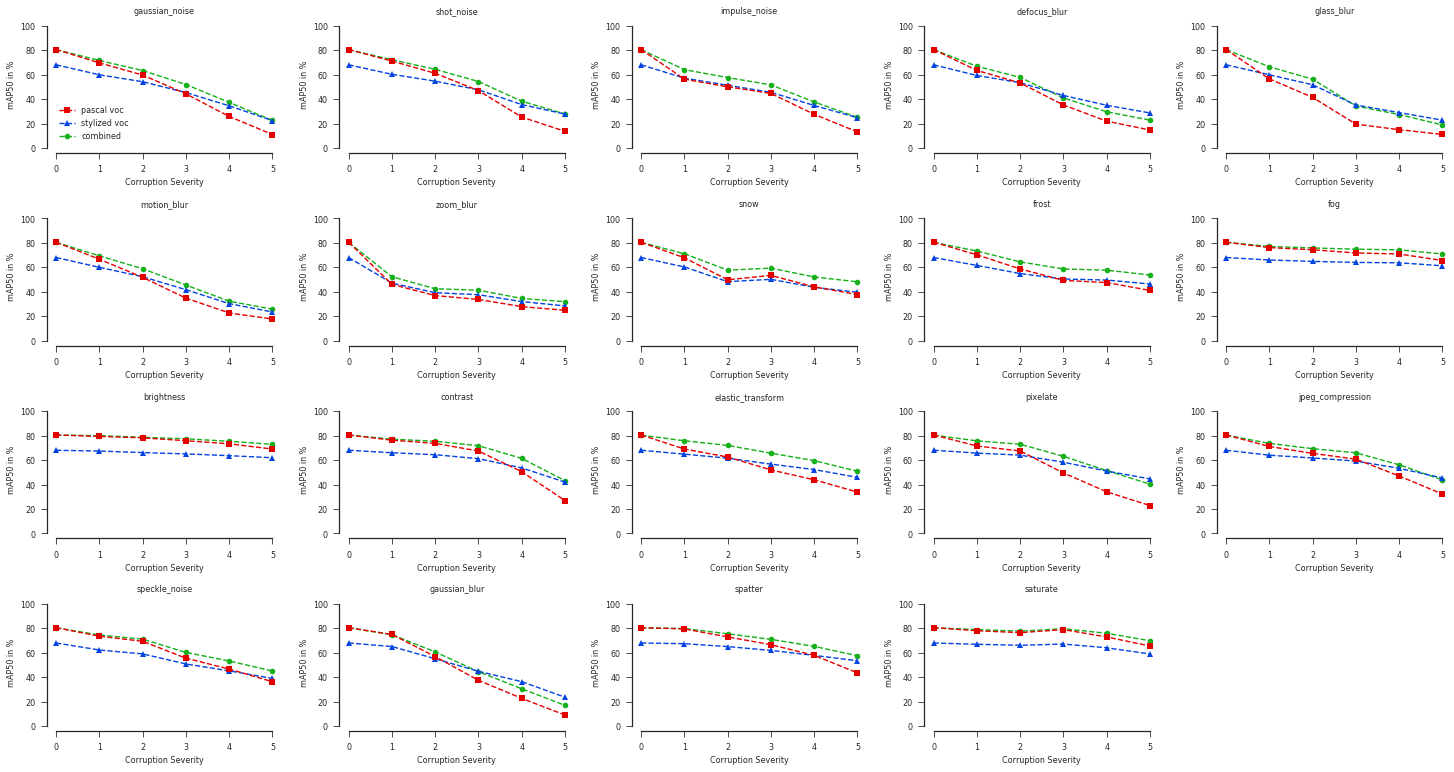

In [58]:
fig = plt.figure(figsize = (25.0, 13.0))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i, distortion in enumerate(distortions):
    plt.subplot(4,5,i+1)

    plt.plot(list(range(6)), voc_results[i,:] * 100, 's--', zorder=3, color='xkcd:red', label='pascal voc')
    plt.plot(list(range(6)), svoc_results[i,:] * 100, '^--', zorder=2, color='xkcd:blue', label='stylized voc')
    plt.plot(list(range(6)), voc_svoc_results[i,:] * 100, 'o--', zorder=1, color='xkcd:green', label='combined')
    #plt.plot(list(range(6)), voc_svoc_short_results[i,:] * 100, 's--', zorder=0, color='xkcd:dandelion', label='vanilla+stylized (short)')


    plt.title(distortion)
    plt.xlabel('Corruption Severity')
    plt.ylabel('mAP50 in %')
    plt.axis([-0.1,5.1,0,105])
    if i == 0:
        plt.legend(loc=3)


sns.despine(trim=True, offset=5)

plt.show()

fig.savefig('figures/results_voc_individual.pdf', bbox_inches='tight')

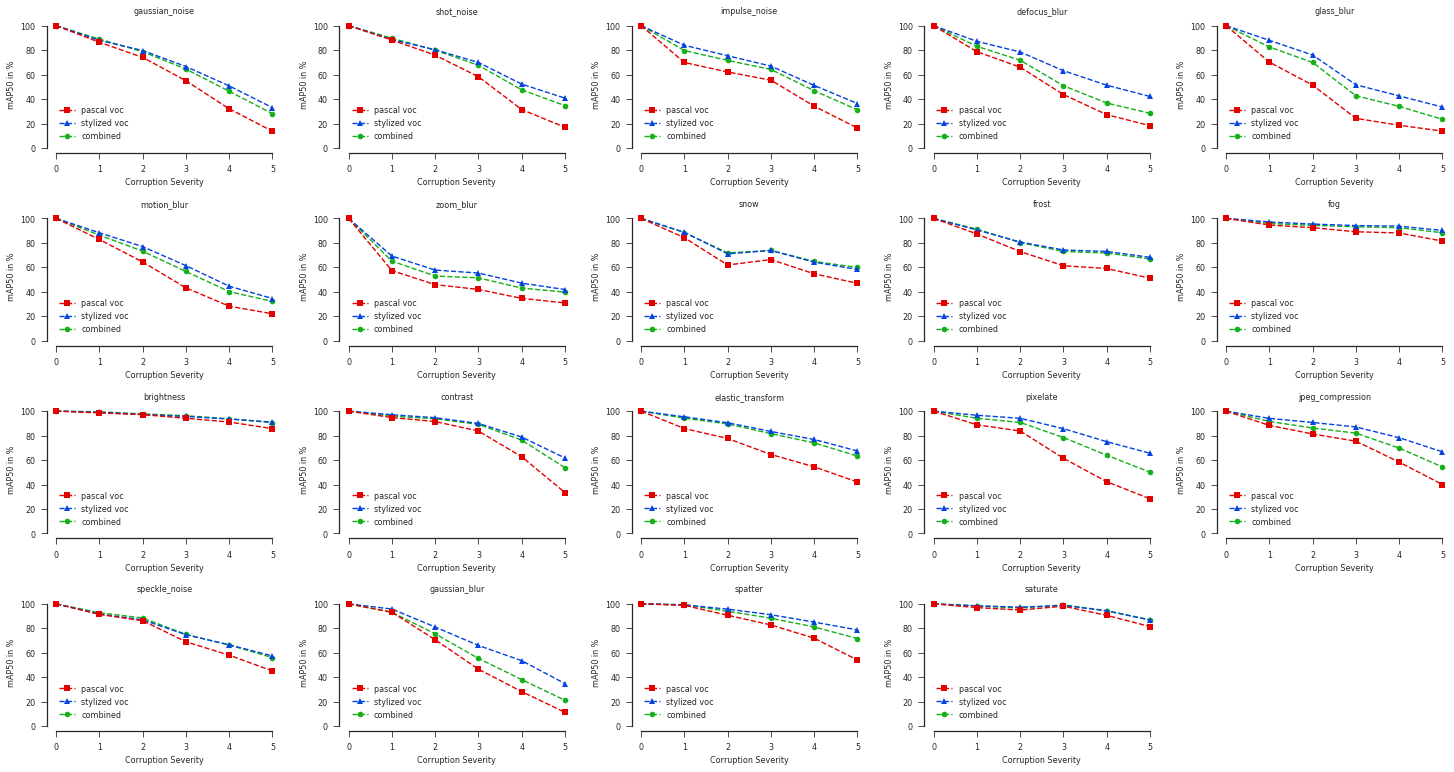

In [50]:
fig = plt.figure(figsize = (25.0, 13.0))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i, distortion in enumerate(distortions):
    plt.subplot(4,5,i+1)

    plt.plot(list(range(6)), voc_results[i,:]/voc_results[i,0] * 100, 's--', zorder=3, color='xkcd:red', label='pascal voc')
    plt.plot(list(range(6)), svoc_results[i,:]/svoc_results[i,0] * 100, '^--', zorder=2, color='xkcd:blue', label='stylized voc')
    plt.plot(list(range(6)), voc_svoc_results[i,:]/voc_svoc_results[i,0] * 100, 'o--', zorder=1, color='xkcd:green', label='combined')
    #plt.plot(list(range(6)), voc_svoc_short_results[i,:] * 100, 's--', zorder=0, color='xkcd:dandelion', label='vanilla+stylized (short)')


    plt.title(distortion)
    plt.xlabel('Corruption Severity')
    plt.ylabel('Relative Performance %')
    plt.axis([-0.1,5.1,0,105])
    if i == 0:
        plt.legend(loc=3)


sns.despine(trim=True, offset=5)

plt.show()

fig.savefig('figures/results_voc_individual.pdf', bbox_inches='tight')

### Coco

In [9]:
def get_results_coco(eval_output, base_performance, task='bbox', metric='AP', verbose=0):
    
    metrics = {'AP':0, 'AP50':1, 'AP75':2, 'APs':3, 'APm':4, 'APl':5, 'AR1':6, 'AR10':7, 'AR100':8, 'ARs':9, 'ARm':10, 'ARl':11}
    assert metric in metrics.keys()
    metric_index = metrics[metric]

    results = np.zeros((20,6), dtype='float32')
    results[:,0] = base_performance

    for i, distortion in enumerate(eval_output):
        for severity in eval_output[distortion]:
            mAP = eval_output[distortion][severity][task][metric_index]
            results[i, severity] = mAP
            if verbose > 0:
                print(distortion, severity, mAP)
                
    return results

def get_distortions(eval_output):
    distortions = []
    for i, distortion in enumerate(eval_output):
        distortions.append(distortion)
    return distortions

In [10]:
with open("results/faster_rcnn_r50_fpn_1x_4gpu_coco_all_1-5_results.pkl", "rb") as f:
    coco_out = pickle.load(f)
with open("results/faster_rcnn_r50_fpn_1x_4gpu_scoco_all_1-5_results.pkl", "rb") as f:
    scoco_out = pickle.load(f)
with open("results/faster_rcnn_r50_fpn_1x_4gpu_cocoscoco_all_1-5_results.pkl", "rb") as f:
    coco_scoco_out = pickle.load(f)

In [11]:
distortions = get_distortions(coco_out)

In [12]:
coco_results = get_results_coco(coco_out, base_performance=0.363)
scoco_results = get_results_coco(scoco_out, base_performance=0.215)
coco_scoco_results = get_results_coco(coco_scoco_out, base_performance=0.346)

In [75]:
# absolute performance under corruption
print(np.mean(coco_results[:15,1:]), 
      np.mean(scoco_results[:15,1:]), 
      np.mean(coco_scoco_results[:15,1:]))

# realtive performance
print(np.mean(coco_results[:15,1:])/coco_results[0,0], 
      np.mean(scoco_results[:15,1:])/scoco_results[0,0], 
      np.mean(coco_scoco_results[:15,1:])/coco_scoco_results[0,0])

0.1820489 0.14098507 0.20387988
0.5015121 0.6557445 0.58924824


### Plots

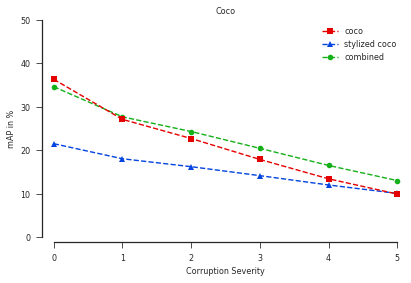

In [73]:
fig = plt.figure(figsize = (6.4, 4.0))

plt.plot(list(range(6)), np.mean(coco_results[:15,:], axis=0) * 100, 's--', zorder=3, color='xkcd:red', label='coco')
plt.plot(list(range(6)), np.mean(scoco_results[:15,:], axis=0) * 100, '^--', zorder=2, color='xkcd:blue', label='stylized coco')
plt.plot(list(range(6)), np.mean(coco_scoco_results[:15,:], axis=0) * 100, 'o--', zorder=1, color='xkcd:green', label='combined')
# plt.plot(list(range(6)), np.mean(voc_svoc_short_results, axis=0) * 100, 's--', zorder=0, color='xkcd:dandelion', label='combined (short)')

# plt.plot(list(range(6)), np.mean(pre_voc_results, axis=0) * 100, 's--', zorder=0, color='xkcd:light red')
# plt.plot(list(range(6)), np.mean(pre_svoc_results, axis=0) * 100, '^--', zorder=0, color='xkcd:light blue')
# plt.plot(list(range(6)), np.mean(pre_voc_svoc_results, axis=0) * 100, 'o--', zorder=0, color='xkcd:light green')
# plt.plot(list(range(6)), np.mean(pre_voc_svoc_short_results, axis=0) * 100, 's--', zorder=0, color='xkcd:light yellow')


plt.title('Coco')
plt.xlabel('Corruption Severity')
plt.ylabel('mAP in %')
plt.axis([-0.1,5.1,0,50])
plt.legend(loc=1)


sns.despine(trim=True, offset=5)

plt.show()

fig.savefig('figures/results_coco_combined.pdf', bbox_inches='tight')

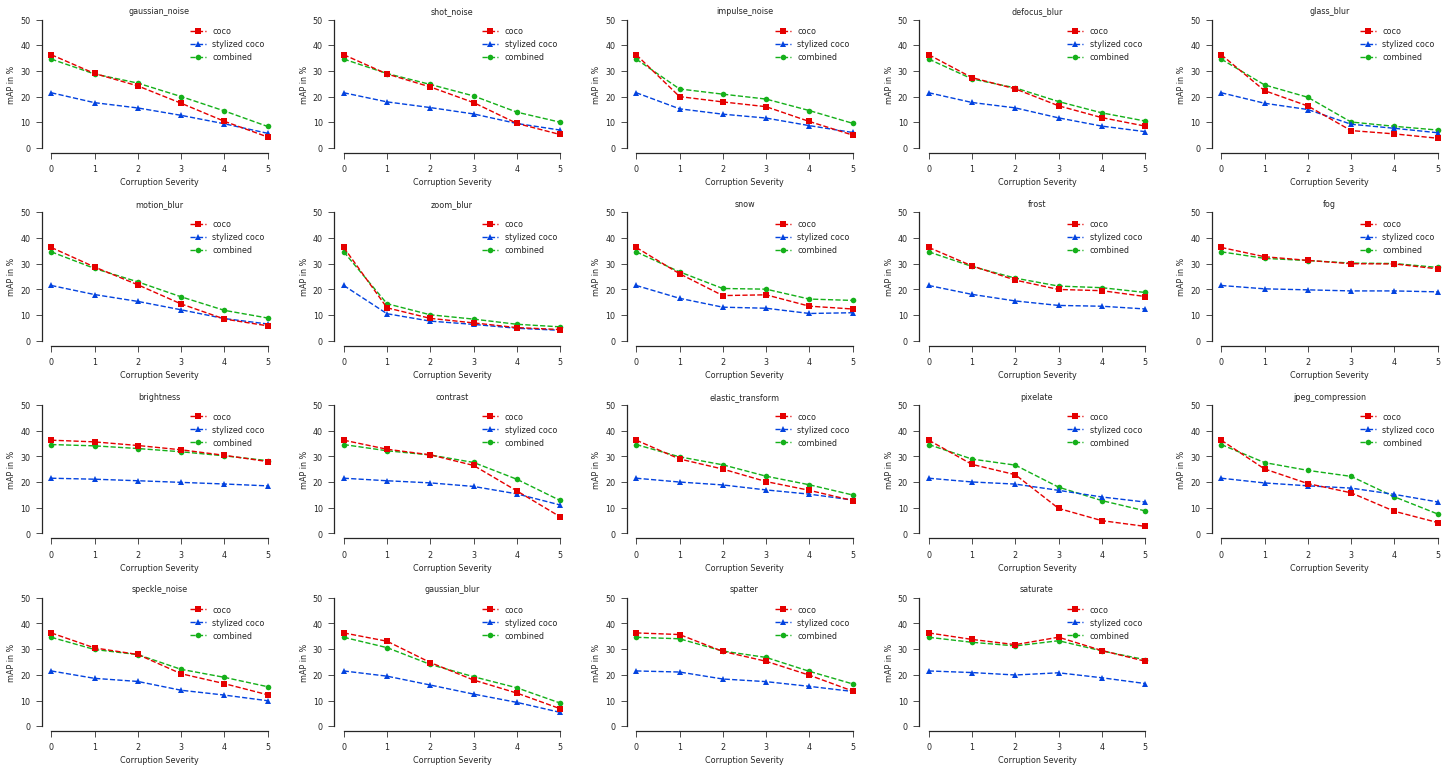

In [14]:
fig = plt.figure(figsize = (25.0, 13.0))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i, distortion in enumerate(distortions):
    plt.subplot(4,5,i+1)

    plt.plot(list(range(6)), coco_results[i,:] * 100, 's--', zorder=3, color='xkcd:red', label='coco')
    plt.plot(list(range(6)), scoco_results[i,:] * 100, '^--', zorder=2, color='xkcd:blue', label='stylized coco')
    plt.plot(list(range(6)), coco_scoco_results[i,:] * 100, 'o--', zorder=1, color='xkcd:green', label='combined')
    #plt.plot(list(range(6)), voc_svoc_short_results[i,:] * 100, 's--', zorder=0, color='xkcd:dandelion', label='vanilla+stylized (short)')


    plt.title(distortion)
    plt.xlabel('Corruption Severity')
    plt.ylabel('mAP in %')
    plt.axis([-0.1,5.1,0,50])
    plt.legend(loc=1)


sns.despine(trim=True, offset=5)

plt.show()

fig.savefig('figures/results_coco_individual.pdf', bbox_inches='tight')